Starting parameters (theta): [0. 0.]
Learning rate (alpha): 0.01
Epochs: 1000
Starting cost: 3670.971432804998

Final parameters (theta): [84.28020666 12.5347492 ]
Final cost: 40.52139807045003


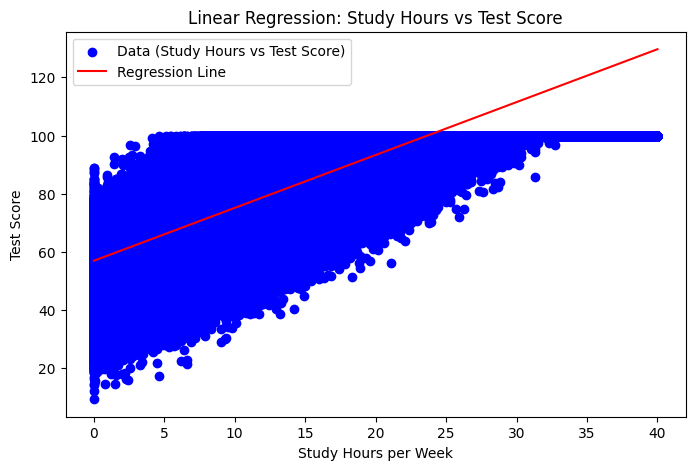

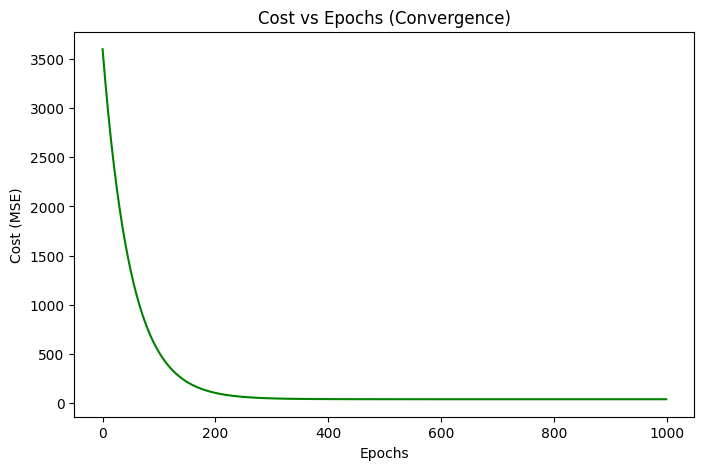

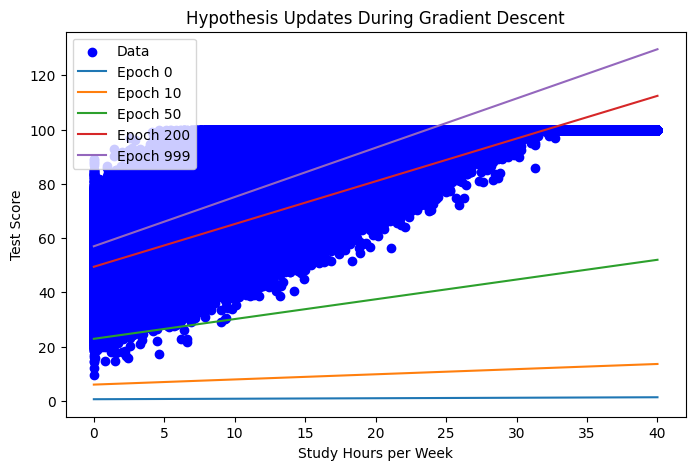

In [11]:
# Linear Regression Project (Study Hours vs Test Score) - Adhvik Harikrishnan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("student_performance.csv")

X = df["weekly_self_study_hours"].values.reshape(-1, 1)   
y = df["total_score"].values              

m = len(y)  


X_mean, X_std = np.mean(X), np.std(X)
X_scaled = (X - X_mean) / X_std

X_b = np.c_[np.ones((m, 1)), X_scaled]  

theta = np.zeros(2)          
alpha = 0.01                 
epochs = 1000                

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    return (1 / (2 * m)) * np.dot(errors, errors)

def gradient_descent(X, y, theta, alpha, epochs):
    cost_history = []
    theta_history = []

    for i in range(epochs):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta = theta - alpha * gradients
        cost = compute_cost(X, y, theta)

        cost_history.append(cost)
        theta_history.append(theta.copy())

    return theta, cost_history, theta_history

initial_cost = compute_cost(X_b, y, theta)
print("Starting parameters (theta):", theta)
print("Learning rate (alpha):", alpha)
print("Epochs:", epochs)
print("Starting cost:", initial_cost)

theta_final, cost_history, theta_history = gradient_descent(X_b, y, theta, alpha, epochs)

final_cost = compute_cost(X_b, y, theta_final)
print("\nFinal parameters (theta):", theta_final)
print("Final cost:", final_cost)

# GRAPHS

# Scatter plot and regression line
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="blue", label="Data (Study Hours vs Test Score)")
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
X_line_scaled = (X_line - X_mean) / X_std
X_line_b = np.c_[np.ones((100, 1)), X_line_scaled]
y_line = X_line_b.dot(theta_final)
plt.plot(X_line, y_line, color="red", label="Regression Line")
plt.xlabel("Study Hours per Week")
plt.ylabel("Test Score")
plt.title("Linear Regression: Study Hours vs Test Score")


plt.legend(loc='upper left')  
plt.show()

# Cost vs epochs
plt.figure(figsize=(8,5))
plt.plot(range(epochs), cost_history, color="green")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Cost vs Epochs (Convergence)")
plt.show()

# Hypothesis updates 
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="blue", label="Data")
for i in [0, 10, 50, 200, 999]:  # show a few stages
    y_pred = X_line_b.dot(theta_history[i])
    plt.plot(X_line, y_pred, label=f"Epoch {i}")
plt.xlabel("Study Hours per Week")
plt.ylabel("Test Score")
plt.title("Hypothesis Updates During Gradient Descent")


plt.legend(loc='upper left')  
plt.show()


In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
